In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [212]:
df = pd.read_csv("/content/my_swim.csv")
df.head()

,activityType,startDate,endDate,duration,durationUnit,totalEnergyBurned,totalDistance,totalSwimmingStrokeCount,HKLapLength,HKAverageMETs
0,Swimming,2023-05-14 00:32:18 +0000,2023-05-14 00:34:57 +0000,159.560921,sec,11.171 kcal,50 m,30 count,25 m,5.60848 kcal/hr·kg
1,Swimming,2023-05-14 00:35:18 +0000,2023-05-14 00:36:36 +0000,72.043523,sec,5.38146 kcal,25 m,15 count,25 m,5.865 kcal/hr·kg
2,Swimming,2023-05-14 00:41:49 +0000,2023-05-14 00:44:19 +0000,79.719310,sec,10.599 kcal,50 m,34 count,25 m,5.7172 kcal/hr·kg
3,Swimming,2023-05-19 00:51:04 +0000,2023-05-19 01:04:48 +0000,213.297579,sec,31.3574 kcal,150 m,99 count,25 m,4.01456 kcal/hr·kg
4,Swimming,2023-05-21 00:37:38 +0000,2023-05-21 00:54:36 +0000,467.350161,sec,59.0861 kcal,225 m,144 count,25 m,4.97168 kcal/hr·kg


In [213]:
df.shape

(146, 10)

In [214]:
df.columns

Index(['activityType', 'startDate', 'endDate', 'duration', 'durationUnit',
       'totalEnergyBurned', 'totalDistance', 'totalSwimmingStrokeCount',
       'HKLapLength', 'HKAverageMETs'],
      dtype='object')

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activityType              146 non-null    object 
 1   startDate                 146 non-null    object 
 2   endDate                   146 non-null    object 
 3   duration                  146 non-null    float64
 4   durationUnit              146 non-null    object 
 5   totalEnergyBurned         146 non-null    object 
 6   totalDistance             146 non-null    object 
 7   totalSwimmingStrokeCount  146 non-null    object 
 8   HKLapLength               146 non-null    object 
 9   HKAverageMETs             146 non-null    object 
dtypes: float64(1), object(9)
memory usage: 11.5+ KB


In [216]:
# Convert date and time columns to datetime objects
df['startDate'] = pd.to_datetime(df['startDate'])
df['endDate'] = pd.to_datetime(df['endDate'])

In [217]:
# Convert totalDistance column to integers and rename the column to totalDistanceMeter
df['totalDistanceMeter'] = df['totalDistance'].str.replace(' m', '').astype(int)
df['totalSwimmingStrokeCount'] = df['totalSwimmingStrokeCount'].str.replace(' count', '').astype(int)
df['totalEnergyBurnedKcal'] = df['totalEnergyBurned'].str.replace(' kcal', '').astype(float)
df['HKAverageMETs(kcal/hr·kg)'] = df['HKAverageMETs'].str.replace(' kcal/hr·kg', '').astype(float)

In [218]:
df.head()

,activityType,startDate,endDate,duration,durationUnit,totalEnergyBurned,totalDistance,totalSwimmingStrokeCount,HKLapLength,HKAverageMETs,totalDistanceMeter,totalEnergyBurnedKcal,HKAverageMETs(kcal/hr·kg)
0,Swimming,2023-05-14 00:32:18+00:00,2023-05-14 00:34:57+00:00,159.560921,sec,11.171 kcal,50 m,30,25 m,5.60848 kcal/hr·kg,50,11.17100,5.60848
1,Swimming,2023-05-14 00:35:18+00:00,2023-05-14 00:36:36+00:00,72.043523,sec,5.38146 kcal,25 m,15,25 m,5.865 kcal/hr·kg,25,5.38146,5.86500
2,Swimming,2023-05-14 00:41:49+00:00,2023-05-14 00:44:19+00:00,79.719310,sec,10.599 kcal,50 m,34,25 m,5.7172 kcal/hr·kg,50,10.59900,5.71720
3,Swimming,2023-05-19 00:51:04+00:00,2023-05-19 01:04:48+00:00,213.297579,sec,31.3574 kcal,150 m,99,25 m,4.01456 kcal/hr·kg,150,31.35740,4.01456
4,Swimming,2023-05-21 00:37:38+00:00,2023-05-21 00:54:36+00:00,467.350161,sec,59.0861 kcal,225 m,144,25 m,4.97168 kcal/hr·kg,225,59.08610,4.97168


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   activityType               146 non-null    object             
 1   startDate                  146 non-null    datetime64[ns, UTC]
 2   endDate                    146 non-null    datetime64[ns, UTC]
 3   duration                   146 non-null    float64            
 4   durationUnit               146 non-null    object             
 5   totalEnergyBurned          146 non-null    object             
 6   totalDistance              146 non-null    object             
 7   totalSwimmingStrokeCount   146 non-null    int64              
 8   HKLapLength                146 non-null    object             
 9   HKAverageMETs              146 non-null    object             
 10  totalDistanceMeter         146 non-null    int64              
 11  totalE

In [220]:
# Convert duration from seconds to minutes
#df['duration_min'] = df['duration'] / 60
#df['DistanceKm'] = df['totalDistanceMeter'] / 1000
#df['Hour'] = df['duration_min'] / 60

In [221]:
df['DistanceKm'] = df['totalDistanceMeter'] / 1000
df['duration_min'] = round(df['duration'] / 60, 2)
df['Hour'] = round(df['duration_min'] / 60, 2)

In [222]:
# Round the totalEnergyBurned and duration_min column to two decimal places
df['totalEnergyBurnedKcal'] = df['totalEnergyBurnedKcal'].round(2)
df['HKAverageMETs(kcal/hr·kg)'] = df['HKAverageMETs(kcal/hr·kg)'].round(2)

In [223]:
df.head()

,activityType,startDate,endDate,duration,durationUnit,totalEnergyBurned,totalDistance,totalSwimmingStrokeCount,HKLapLength,HKAverageMETs,totalDistanceMeter,totalEnergyBurnedKcal,HKAverageMETs(kcal/hr·kg),DistanceKm,duration_min,Hour
0,Swimming,2023-05-14 00:32:18+00:00,2023-05-14 00:34:57+00:00,159.560921,sec,11.171 kcal,50 m,30,25 m,5.60848 kcal/hr·kg,50,11.17,5.61,0.050,2.66,0.04
1,Swimming,2023-05-14 00:35:18+00:00,2023-05-14 00:36:36+00:00,72.043523,sec,5.38146 kcal,25 m,15,25 m,5.865 kcal/hr·kg,25,5.38,5.86,0.025,1.20,0.02
2,Swimming,2023-05-14 00:41:49+00:00,2023-05-14 00:44:19+00:00,79.719310,sec,10.599 kcal,50 m,34,25 m,5.7172 kcal/hr·kg,50,10.60,5.72,0.050,1.33,0.02
3,Swimming,2023-05-19 00:51:04+00:00,2023-05-19 01:04:48+00:00,213.297579,sec,31.3574 kcal,150 m,99,25 m,4.01456 kcal/hr·kg,150,31.36,4.01,0.150,3.55,0.06
4,Swimming,2023-05-21 00:37:38+00:00,2023-05-21 00:54:36+00:00,467.350161,sec,59.0861 kcal,225 m,144,25 m,4.97168 kcal/hr·kg,225,59.09,4.97,0.225,7.79,0.13


In [224]:
# Drop unnecessary columns
df.drop(columns=['totalDistance', 'duration', 'durationUnit', 'totalEnergyBurned', 'HKLapLength', 'HKAverageMETs'], inplace=True)

In [225]:
# Group the data by the month of the 'Date' column
df['month'] = df['startDate'].dt.to_period('M')  # Extract the month

<ipython-input-225-4a0d5e1b6034>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['startDate'].dt.to_period('M')  # Extract the month


##SUM of Details by Months

In [226]:
# Group the data by month and calculate the mean of duration in minutes
m_H = df.groupby('month')['Hour'].sum()
m_H.index = m_H.index.strftime('%B %Y')

In [227]:
import matplotlib.patches as patches

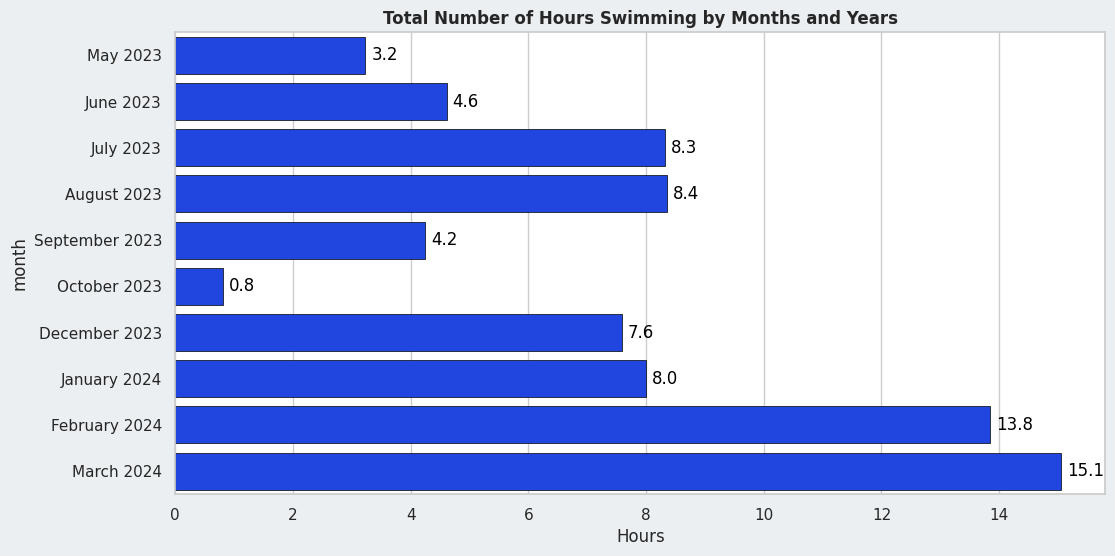

In [228]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
ax = sns.barplot(y=m_H.index.astype(str), x=m_H, color = '#0033FF')
# Iterate through each bar and set rounded corners
for patch in ax.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Total Number of Hours Swimming by Months and Years', fontweight='bold')
plt.xlabel('Hours')
#plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(m_H):
    ax.text(v + 0.1, i, f'{v:.1f}', color='black', va='center')
image_path = '1.png'
plt.savefig(image_path, format='png', dpi=300)
plt.show()

In [229]:
m_K = df.groupby('month')['DistanceKm'].sum()
m_K.index = m_K.index.strftime('%B %Y')

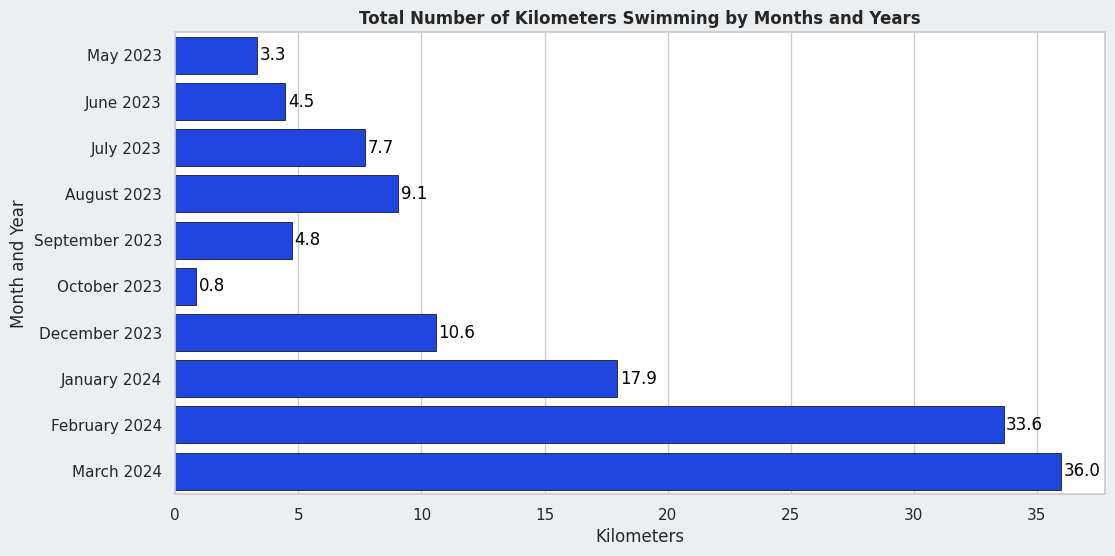

In [230]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
bx = sns.barplot(y=m_K.index.astype(str), x=m_K, color = '#0033FF')  # Convert the index (months) to string for better labeling
# Iterate through each bar and set rounded corners
for patch in bx.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Total Number of Kilometers Swimming by Months and Years', fontweight='bold')
plt.xlabel('Kilometers')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(m_K):
    bx.text(v + 0.1, i, f'{v:.1f}', color='black', va='center')
image_path = '3.png'
plt.savefig(image_path, format='png', dpi=300)
plt.show()

In [231]:
m_M = df.groupby('month')['totalDistanceMeter'].sum()
m_M.index = m_M.index.strftime('%B %Y')

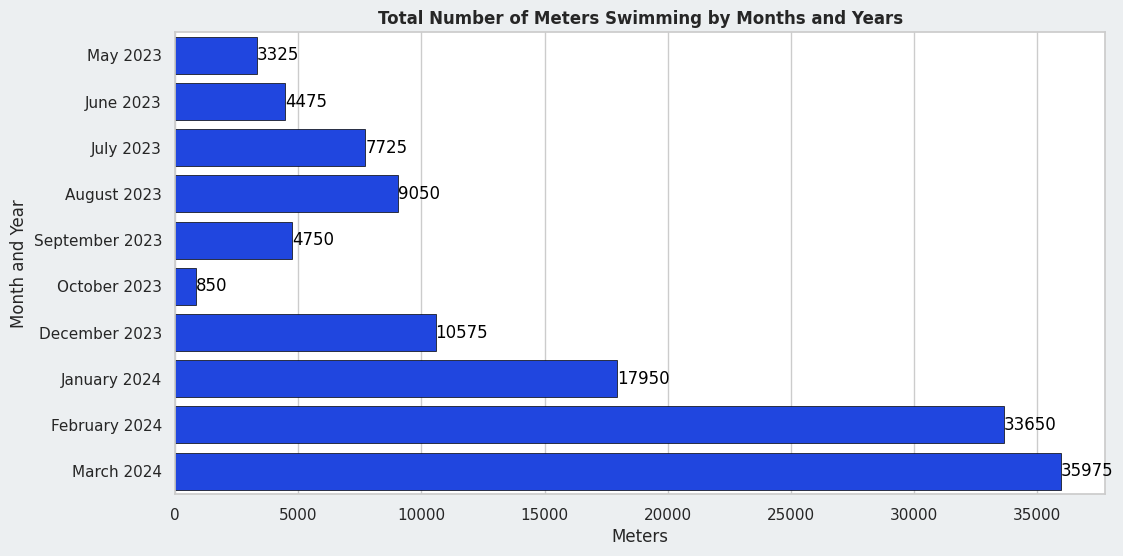

In [232]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
cx = sns.barplot(y=m_M.index.astype(str), x=m_M, color = '#0033FF')  # Convert the index (months) to string for better labeling
# Iterate through each bar and set rounded corners
for patch in cx.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Total Number of Meters Swimming by Months and Years', fontweight='bold')
plt.xlabel('Meters')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(m_M):
    cx.text(v + 0.1, i, f'{int(v)}', color='black', va='center')
plt.show()

In [233]:
m_S = df.groupby('month')['totalSwimmingStrokeCount'].sum()
m_S.index = m_S.index.strftime('%B %Y')

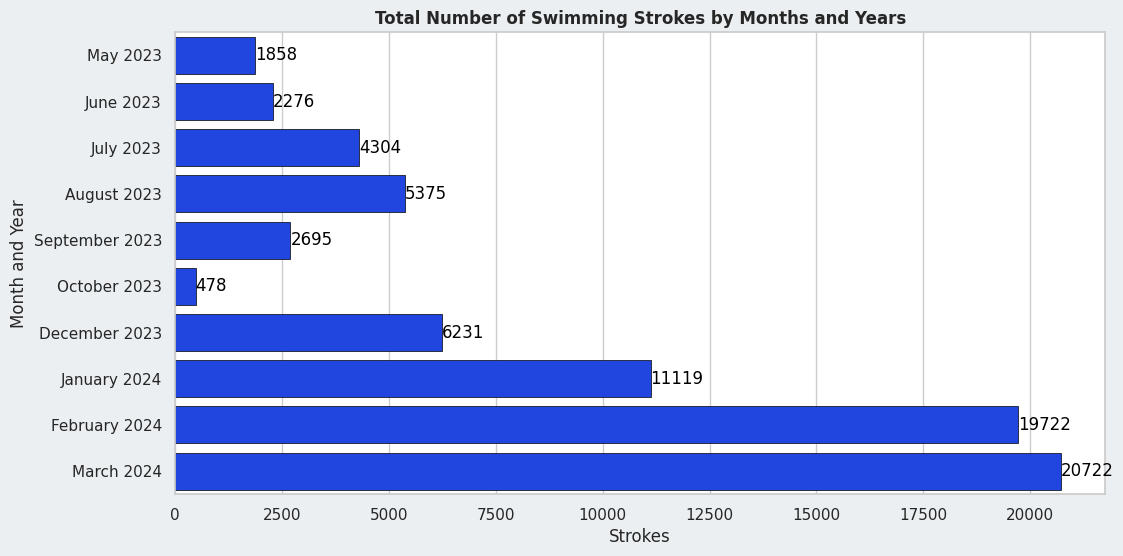

In [234]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
dx = sns.barplot(y=m_S.index.astype(str), x=m_S, color = '#0033FF')  # Convert the index (months) to string for better labeling
# Iterate through each bar and set rounded corners
for patch in dx.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Total Number of Swimming Strokes by Months and Years', fontweight='bold')
plt.xlabel('Strokes')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(m_S):
    dx.text(v + 0.1, i, f'{int(v)}', color='black', va='center')
image_path = '5.png'
plt.savefig(image_path, format='png', dpi=300)
plt.show()

In [235]:
m_E = df.groupby('month')['totalEnergyBurnedKcal'].sum()
m_E.index = m_E.index.strftime('%B %Y')

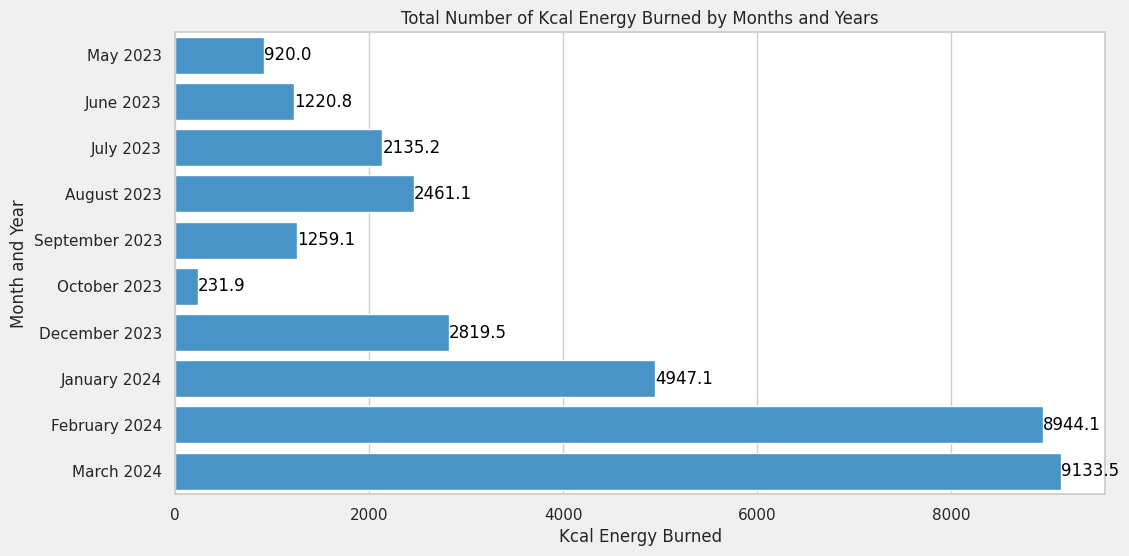

In [236]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#f0f0f0')
ex = sns.barplot(y=m_E.index.astype(str), x=m_E, color = '#3498DB')  # Convert the index (months) to string for better labeling
plt.title('Total Number of Kcal Energy Burned by Months and Years')
plt.xlabel('Kcal Energy Burned')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(m_E):
    ex.text(v + 0.1, i, f'{v:.1f}', color='black', va='center')
plt.show()

In [237]:
m_A = df.groupby('month')['HKAverageMETs(kcal/hr·kg)'].sum()
m_A.index = m_A.index.strftime('%B %Y')

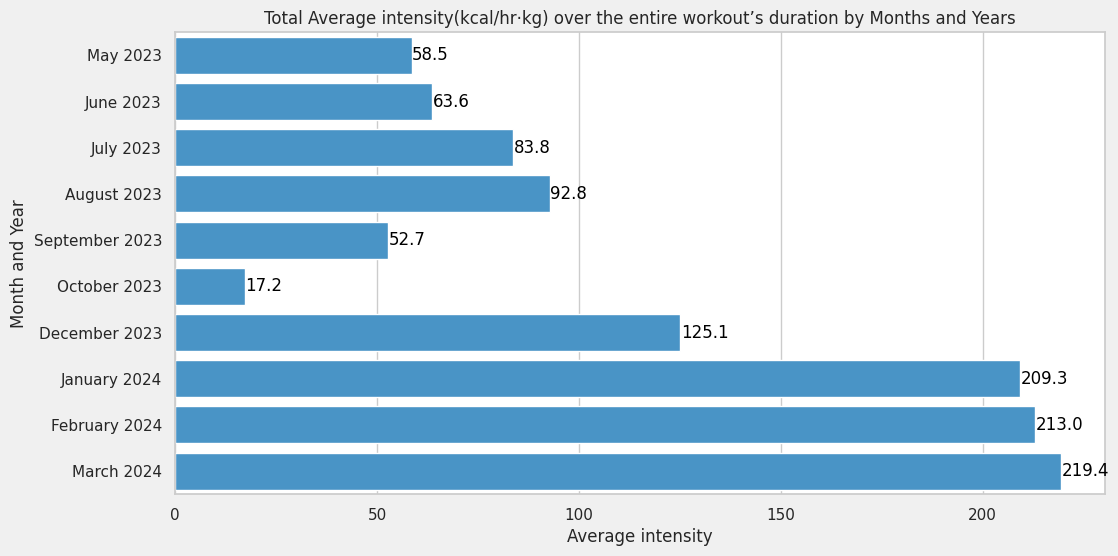

In [238]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#f0f0f0')
fx = sns.barplot(y=m_A.index.astype(str), x=m_A, color = '#3498DB')  # Convert the index (months) to string for better labeling
plt.title('Total Average intensity(kcal/hr·kg) over the entire workout’s duration by Months and Years')
plt.xlabel('Average intensity')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(m_A):
    fx.text(v + 0.1, i, f'{v:.1f}', color='black', va='center')
plt.show()

##Average of Details by Months

In [239]:
a_H = df.groupby('month')['duration_min'].mean()
a_H.index = a_H.index.strftime('%B %Y')

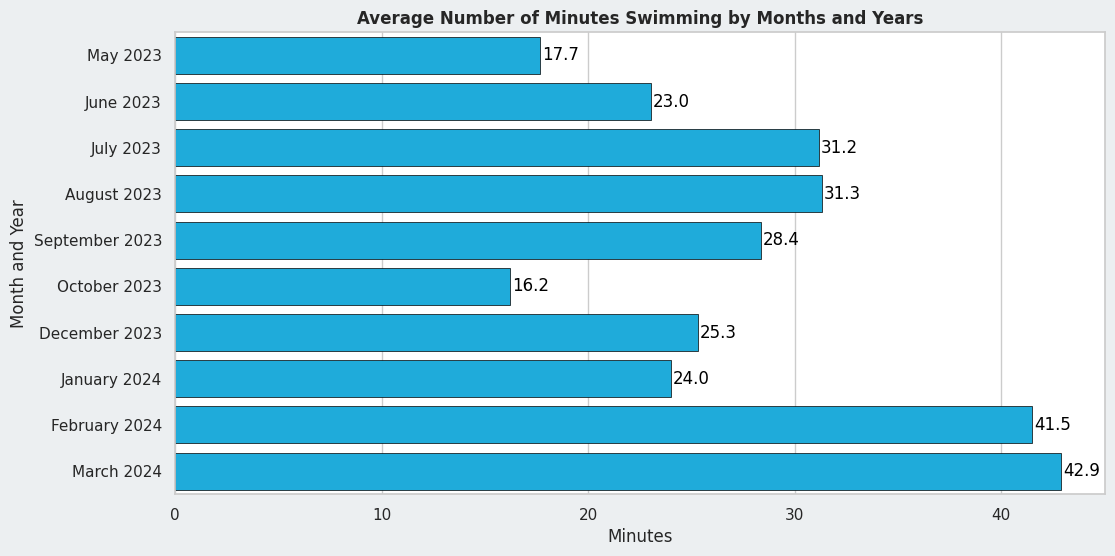

In [240]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
gx = sns.barplot(y=a_H.index.astype(str), x=a_H, color = '#00bbf9')  # Convert the index (months) to string for better labeling
# Iterate through each bar and set rounded corners
for patch in gx.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Average Number of Minutes Swimming by Months and Years', fontweight = 'bold')
plt.xlabel('Minutes')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(a_H):
    gx.text(v + 0.1, i, f'{v:.1f}', color='black', va='center')
image_path = '2.png'
plt.savefig(image_path, format='png', dpi=300)
plt.show()

In [241]:
a_M = df.groupby('month')['totalDistanceMeter'].mean()
a_M = (a_M / 25).round() * 25
a_M.index = a_M.index.strftime('%B %Y')

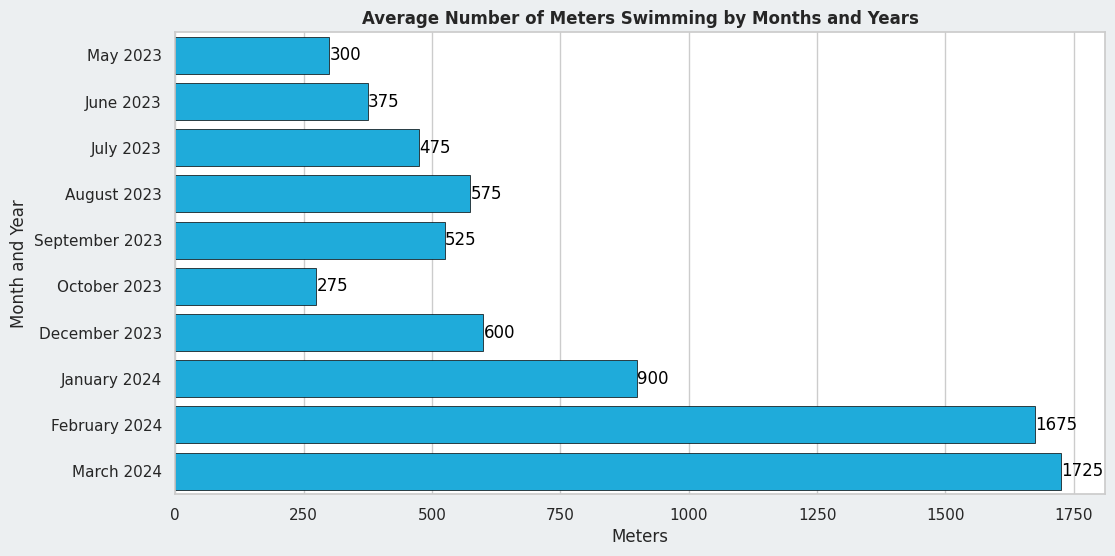

In [242]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
hx = sns.barplot(y=a_M.index.astype(str), x=a_M, color = '#00bbf9')  # Convert the index (months) to string for better labeling
# Iterate through each bar and set rounded corners
for patch in hx.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Average Number of Meters Swimming by Months and Years', fontweight = 'bold')
plt.xlabel('Meters')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(a_M):
    hx.text(v + 0.1, i, f'{int(v)}', color='black', va='center')
image_path = '4.png'
plt.savefig(image_path, format='png', dpi=300)
plt.show()

In [243]:
a_S = df.groupby('month')['totalSwimmingStrokeCount'].mean()
a_S.index = a_S.index.strftime('%B %Y')

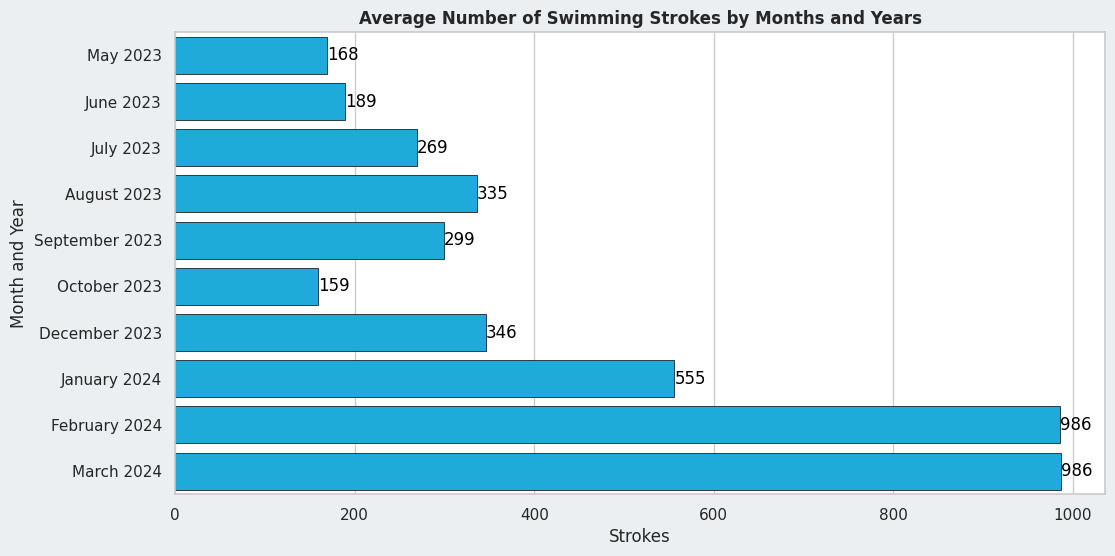

In [244]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
ix = sns.barplot(y=a_S.index.astype(str), x=a_S, color = '#00bbf9')  # Convert the index (months) to string for better labeling
# Iterate through each bar and set rounded corners
for patch in ix.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Average Number of Swimming Strokes by Months and Years', fontweight = 'bold')
plt.xlabel('Strokes')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(a_S):
    ix.text(v + 0.1, i, f'{int(v)}', color='black', va='center')
image_path = '6.png'
plt.savefig(image_path, format='png', dpi=300)
plt.show()

In [245]:
a_E = df.groupby('month')['totalEnergyBurnedKcal'].mean()
a_E.index = a_E.index.strftime('%B %Y')

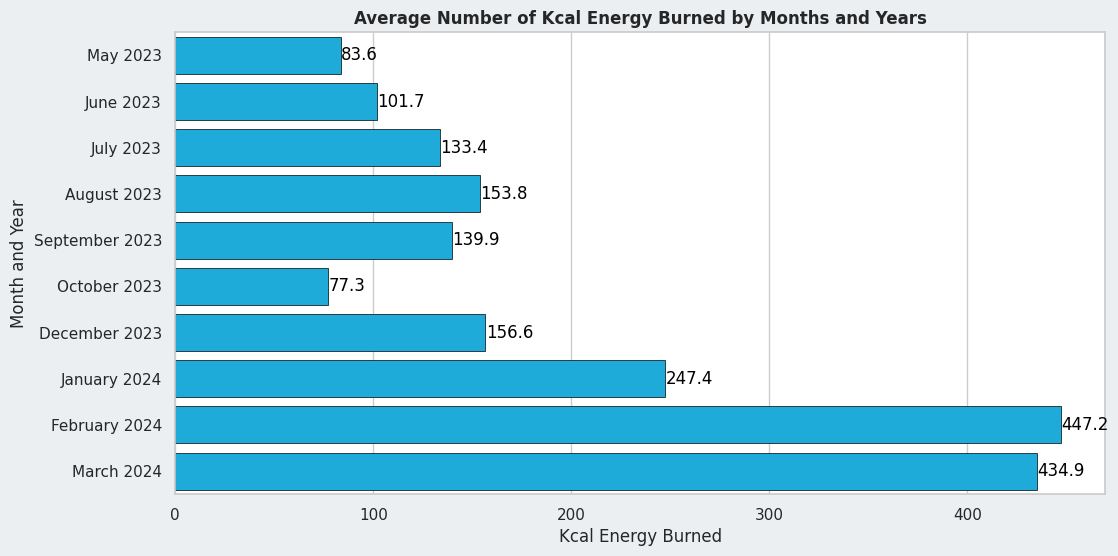

In [246]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
jx = sns.barplot(y=a_E.index.astype(str), x=a_E, color = '#00bbf9')  # Convert the index (months) to string for better labeling
# Iterate through each bar and set rounded corners
for patch in jx.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Average Number of Kcal Energy Burned by Months and Years', fontweight = 'bold')
plt.xlabel('Kcal Energy Burned')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(a_E):
    jx.text(v + 0.1, i, f'{v:.1f}', color='black', va='center')
image_path = '7.png'
plt.savefig(image_path, format='png', dpi=300)
plt.show()

In [247]:
a_A = df.groupby('month')['HKAverageMETs(kcal/hr·kg)'].mean()
a_A.index = a_A.index.strftime('%B %Y')

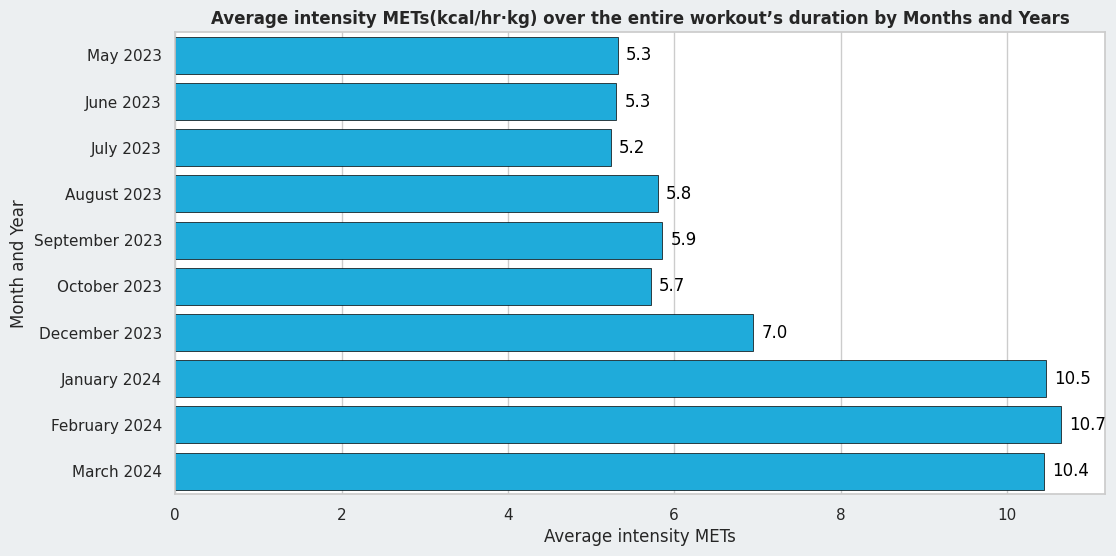

In [262]:
# Plot the sum of 'Hour' over different months using a bar plot
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#ECEFF1')
kx = sns.barplot(y=a_A.index.astype(str), x=a_A, color = '#00bbf9')  # Convert the index (months) to string for better labeling
# Iterate through each bar and set rounded corners
for patch in kx.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
plt.title('Average intensity METs(kcal/hr·kg) over the entire workout’s duration by Months and Years', fontweight = 'bold')
plt.xlabel('Average intensity METs')
plt.ylabel('Month and Year')
# Add text annotations to the end of each bar
for i, v in enumerate(a_A):
    kx.text(v + 0.1, i, f'{v:.1f}', color='black', va='center')
image_path = '8.png'
plt.savefig(image_path, format='png', dpi=300)
plt.show()

##Dates When Absent for Swimming

In [249]:
df.head(10)

,activityType,startDate,endDate,totalSwimmingStrokeCount,totalDistanceMeter,totalEnergyBurnedKcal,HKAverageMETs(kcal/hr·kg),DistanceKm,duration_min,Hour,month
0,Swimming,2023-05-14 00:32:18+00:00,2023-05-14 00:34:57+00:00,30,50,11.17,5.61,0.050,2.66,0.04,2023-05
1,Swimming,2023-05-14 00:35:18+00:00,2023-05-14 00:36:36+00:00,15,25,5.38,5.86,0.025,1.20,0.02,2023-05
2,Swimming,2023-05-14 00:41:49+00:00,2023-05-14 00:44:19+00:00,34,50,10.60,5.72,0.050,1.33,0.02,2023-05
3,Swimming,2023-05-19 00:51:04+00:00,2023-05-19 01:04:48+00:00,99,150,31.36,4.01,0.150,3.55,0.06,2023-05
4,Swimming,2023-05-21 00:37:38+00:00,2023-05-21 00:54:36+00:00,144,225,59.09,4.97,0.225,7.79,0.13,2023-05
5,Swimming,2023-05-22 00:32:56+00:00,2023-05-22 01:00:48+00:00,255,350,124.28,5.43,0.350,27.87,0.46,2023-05
6,Swimming,2023-05-23 12:50:33+00:00,2023-05-23 13:23:22+00:00,151,275,81.15,4.89,0.275,20.94,0.35,2023-05
7,Swimming,2023-05-25 00:43:18+00:00,2023-05-25 01:07:56+00:00,221,475,110.53,5.45,0.475,24.64,0.41,2023-05
8,Swimming,2023-05-26 00:38:06+00:00,2023-05-26 01:06:51+00:00,267,425,117.93,5.09,0.425,28.75,0.48,2023-05
9,Swimming,2023-05-28 00:25:37+00:00,2023-05-28 01:01:38+00:00,352,700,186.13,6.07,0.700,36.02,0.60,2023-05


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   activityType               146 non-null    object             
 1   startDate                  146 non-null    datetime64[ns, UTC]
 2   endDate                    146 non-null    datetime64[ns, UTC]
 3   totalSwimmingStrokeCount   146 non-null    int64              
 4   totalDistanceMeter         146 non-null    int64              
 5   totalEnergyBurnedKcal      146 non-null    float64            
 6   HKAverageMETs(kcal/hr·kg)  146 non-null    float64            
 7   DistanceKm                 146 non-null    float64            
 8   duration_min               146 non-null    float64            
 9   Hour                       146 non-null    float64            
 10  month                      146 non-null    period[M]          
dtypes: dat

In [251]:
# Extract unique year-month pairs
df['year_month'] = df['startDate'].dt.strftime('%Y-%m')

In [252]:
# Calculate missing dates and total days per month
summary_data = []

for year_month in df['year_month'].unique():
    # Extract year and month
    year, month = map(int, year_month.split('-'))

    # Calculate total days in the month using the calendar module
    _, total_days_in_month = calendar.monthrange(year, month)

    # Filter data for the current year-month
    current_month_df = df[df['year_month'] == year_month]

    # Get available dates
    available_dates = set(current_month_df['startDate'].dt.date)

    # Create a set of all dates in the current month
    start_date = pd.Timestamp(f'{year}-{month}-01')
    end_date = pd.Timestamp(f'{year}-{month}-{total_days_in_month}')
    all_dates_in_month = set(pd.date_range(start_date, end_date).date)

    # Calculate missing dates
    missing_dates = all_dates_in_month - available_dates
    missing_dates_count = len(missing_dates)

    # Add data to summary list
    summary_data.append({
        'Month Year': f"{calendar.month_name[month]} {year}",
        'Total Days': total_days_in_month,
        'Missing Dates': missing_dates_count
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_data)

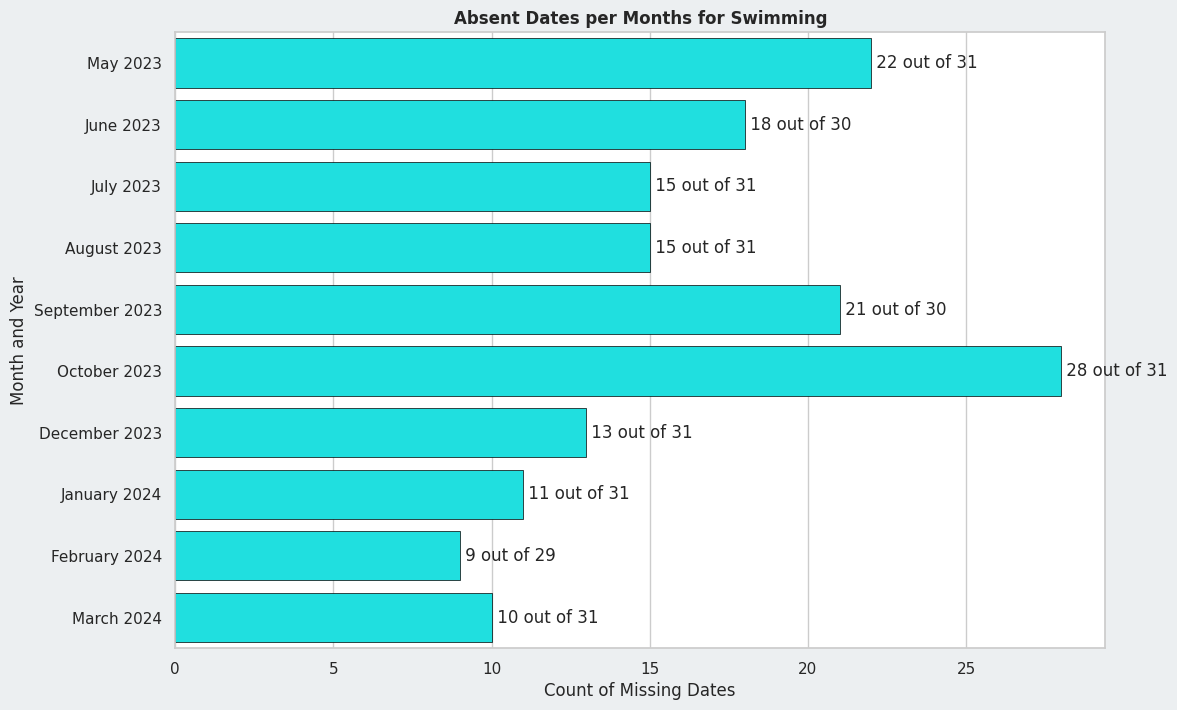

In [253]:
# Plotting the bar chart
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('#ECEFF1')
# Plot horizontal bar chart
bar_plot = sns.barplot(x='Missing Dates', y='Month Year', data=summary_df, color='#00FFFF')
# Iterate through each bar and set rounded corners
for patch in bar_plot.patches:
    patch.set_edgecolor('black')  # Set edge color of the bar
    # Customize the corner radius
    patch.set_capstyle('round')
    patch.set_linewidth(0.5)
# Add text labels at the end of each bar
for index, row in summary_df.iterrows():
    # Create label with missing dates out of total days in month
    label = f' {row["Missing Dates"]} out of {row["Total Days"]}'
    # Add text label to the plot
    bar_plot.text(row['Missing Dates'], index, label, va='center', ha='left')

# Set the plot labels
plt.xlabel('Count of Missing Dates')
plt.ylabel('Month and Year')
plt.title('Absent Dates per Months for Swimming', fontweight = 'bold')
image_path = '9.png'
#plt.savefig(image_path, format='png', dpi=300)
# Display the plot
plt.show()

###Min and Max Swim

In [256]:
df.head()

,activityType,startDate,endDate,totalSwimmingStrokeCount,totalDistanceMeter,totalEnergyBurnedKcal,HKAverageMETs(kcal/hr·kg),DistanceKm,duration_min,Hour,month,year_month
0,Swimming,2023-05-14 00:32:18+00:00,2023-05-14 00:34:57+00:00,30,50,11.17,5.61,0.050,2.66,0.04,2023-05,2023-05
1,Swimming,2023-05-14 00:35:18+00:00,2023-05-14 00:36:36+00:00,15,25,5.38,5.86,0.025,1.20,0.02,2023-05,2023-05
2,Swimming,2023-05-14 00:41:49+00:00,2023-05-14 00:44:19+00:00,34,50,10.60,5.72,0.050,1.33,0.02,2023-05,2023-05
3,Swimming,2023-05-19 00:51:04+00:00,2023-05-19 01:04:48+00:00,99,150,31.36,4.01,0.150,3.55,0.06,2023-05,2023-05
4,Swimming,2023-05-21 00:37:38+00:00,2023-05-21 00:54:36+00:00,144,225,59.09,4.97,0.225,7.79,0.13,2023-05,2023-05


In [257]:
# Sort the DataFrame based on 'totalDistanceMeter' in ascending order
df_sorted = df.sort_values(by='totalDistanceMeter')
df_min_10 = df_sorted.head(10)

#pd.DataFrame(df_min_10).to_csv('Min_10.csv', index = False)

In [258]:
#min = pd.read_csv('Min_10.csv')
#min.head(10)

In [259]:
# Sort the DataFrame based on 'totalDistanceMeter' in descending order
df_sorted_desc = df.sort_values(by='totalDistanceMeter', ascending=False)
df_max_10 = df_sorted_desc.head(10)
#pd.DataFrame(df_max_10).to_csv('Max_10.csv', index = False)

In [260]:
df_max_10

,activityType,startDate,endDate,totalSwimmingStrokeCount,totalDistanceMeter,totalEnergyBurnedKcal,HKAverageMETs(kcal/hr·kg),DistanceKm,duration_min,Hour,month,year_month
122,Swimming,2024-02-25 01:19:41+00:00,2024-02-25 02:28:16+00:00,1697,2800,733.80,11.19,2.80,68.59,1.14,2024-02,2024-02
117,Swimming,2024-02-18 01:37:09+00:00,2024-02-18 02:41:21+00:00,1502,2600,689.48,11.23,2.60,64.21,1.07,2024-02,2024-02
136,Swimming,2024-03-17 01:11:22+00:00,2024-03-17 02:15:58+00:00,1511,2600,659.99,10.75,2.60,64.59,1.08,2024-03,2024-03
130,Swimming,2024-03-08 01:13:52+00:00,2024-03-08 02:16:25+00:00,1401,2500,646.09,10.85,2.50,62.56,1.04,2024-03,2024-03
132,Swimming,2024-03-11 00:46:40+00:00,2024-03-11 01:48:50+00:00,1398,2500,645.12,10.75,2.50,62.16,1.04,2024-03,2024-03
145,Swimming,2024-03-30 00:45:00+00:00,2024-03-30 01:47:23+00:00,1407,2300,604.16,10.25,2.30,62.39,1.04,2024-03,2024-03
123,Swimming,2024-02-27 00:30:39+00:00,2024-02-27 01:23:58+00:00,1285,2200,566.83,11.14,2.20,53.31,0.89,2024-02,2024-02
134,Swimming,2024-03-14 00:56:03+00:00,2024-03-14 01:51:22+00:00,1279,2200,565.02,10.75,2.20,55.31,0.92,2024-03,2024-03
124,Swimming,2024-02-29 12:33:19+00:00,2024-02-29 13:21:16+00:00,1041,1850,474.88,10.52,1.85,44.98,0.75,2024-02,2024-02
135,Swimming,2024-03-15 12:38:04+00:00,2024-03-15 13:20:49+00:00,1046,1800,439.07,10.82,1.80,42.74,0.71,2024-03,2024-03
